In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
import random
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv('Test 1.csv')
df.head()

,customer_id,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer
0,713782,AX03efs,W,N,33407.901749,3.000000,0.531112,619,503.249027,23.977827,0.137289,False
1,515901,AX03efs,E,N,19927.533533,20.257927,0.297439,527,820.108146,22.986398,0.052264,False
2,95166,AX03efs,W,Y,51222.470997,4.000000,0.018463,606,586.605795,24.939219,0.452035,False
3,425557,AX03efs,E,Y,67211.587467,18.653631,0.089344,585,634.701982,24.841147,0.564619,False
4,624581,AX03efs,W,N,20093.342158,4.000000,0.094948,567,631.949979,24.679363,0.917304,False


In [3]:
df.shape

(10000, 12)

In [4]:
df.isnull().sum()

customer_id          0
demographic_slice    0
country_reg          0
ad_exp               0
est_income           0
hold_bal             0
pref_cust_prob       0
imp_cscore           0
RiskScore            0
imp_crediteval       0
axio_score           0
card_offer           0
dtype: int64

* There are no null values in the data set. It is a clean data set
* The dataset consists of 10000 observations and 12 variables

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
customer_id          10000 non-null int64
demographic_slice    10000 non-null object
country_reg          10000 non-null object
ad_exp               10000 non-null object
est_income           10000 non-null float64
hold_bal             10000 non-null float64
pref_cust_prob       10000 non-null float64
imp_cscore           10000 non-null int64
RiskScore            10000 non-null float64
imp_crediteval       10000 non-null float64
axio_score           10000 non-null float64
card_offer           10000 non-null bool
dtypes: bool(1), float64(6), int64(2), object(3)
memory usage: 869.2+ KB


There are :
* 3 categorical variables
* 8 continuous variables
* 1 boolean output variable

In [6]:
cust_id=df.customer_id
type(cust_id)

pandas.core.series.Series

* Taking customer id in a series so that we can refer it later
* cutomer_id is of no use to us in model building. So it can be safely removed

In [7]:
df.drop('customer_id',axis=1,inplace=True)
df.head()

,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer
0,AX03efs,W,N,33407.901749,3.000000,0.531112,619,503.249027,23.977827,0.137289,False
1,AX03efs,E,N,19927.533533,20.257927,0.297439,527,820.108146,22.986398,0.052264,False
2,AX03efs,W,Y,51222.470997,4.000000,0.018463,606,586.605795,24.939219,0.452035,False
3,AX03efs,E,Y,67211.587467,18.653631,0.089344,585,634.701982,24.841147,0.564619,False
4,AX03efs,W,N,20093.342158,4.000000,0.094948,567,631.949979,24.679363,0.917304,False


In [8]:
df['country_reg'].value_counts()

E    5007
W    4993
Name: country_reg, dtype: int64

In [9]:
df2=pd.get_dummies(df,columns=['demographic_slice','ad_exp','country_reg'])
df2.head()


,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer,demographic_slice_AX03efs,demographic_slice_BWEsk45,demographic_slice_CARDIF2,demographic_slice_DERS3w5,ad_exp_N,ad_exp_Y,country_reg_E,country_reg_W
0,33407.901749,3.000000,0.531112,619,503.249027,23.977827,0.137289,False,1,0,0,0,1,0,0,1
1,19927.533533,20.257927,0.297439,527,820.108146,22.986398,0.052264,False,1,0,0,0,1,0,1,0
2,51222.470997,4.000000,0.018463,606,586.605795,24.939219,0.452035,False,1,0,0,0,0,1,0,1
3,67211.587467,18.653631,0.089344,585,634.701982,24.841147,0.564619,False,1,0,0,0,0,1,1,0
4,20093.342158,4.000000,0.094948,567,631.949979,24.679363,0.917304,False,1,0,0,0,1,0,0,1


Converting all categorical features into encoded features using one hot encoding

In [10]:
outcome=np.where(df['card_offer']==True,1,0)
df2['card_offer']=outcome
df2.head()

,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer,demographic_slice_AX03efs,demographic_slice_BWEsk45,demographic_slice_CARDIF2,demographic_slice_DERS3w5,ad_exp_N,ad_exp_Y,country_reg_E,country_reg_W
0,33407.901749,3.000000,0.531112,619,503.249027,23.977827,0.137289,0,1,0,0,0,1,0,0,1
1,19927.533533,20.257927,0.297439,527,820.108146,22.986398,0.052264,0,1,0,0,0,1,0,1,0
2,51222.470997,4.000000,0.018463,606,586.605795,24.939219,0.452035,0,1,0,0,0,0,1,0,1
3,67211.587467,18.653631,0.089344,585,634.701982,24.841147,0.564619,0,1,0,0,0,0,1,1,0
4,20093.342158,4.000000,0.094948,567,631.949979,24.679363,0.917304,0,1,0,0,0,1,0,0,1


In [11]:
df2.card_offer.value_counts(normalize=True)

0    0.8469
1    0.1531
Name: card_offer, dtype: float64

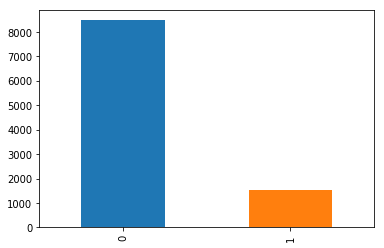

In [12]:
df2.card_offer.value_counts().plot(kind='bar')
plt.show()

#### Splitting data into train and test

In [13]:
X=df2.drop('card_offer',axis=1)
Y=df2['card_offer']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)


### Logistic Regression

In [14]:
log=LogisticRegression(C=0.0007)
log.fit(x_train,y_train)
print('Train score:',log.score(x_train,y_train))
print('Test score:',log.score(x_test,y_test))
#print(log.C_)

Train score: 0.8471428571428572
Test score: 0.8433333333333334


In [15]:
from sklearn.metrics import confusion_matrix,f1_score,roc_curve,roc_auc_score,cohen_kappa_score

In [16]:
fpr,tpr,threholds=roc_curve(y_test,log.predict_proba(x_test)[:,1])
optF1=0
optTh=0
for th in threholds:
    preds=np.where(log.predict_proba(x_test)[:,1]>th,1,0)
    f1=f1_score(y_test,preds)
    if(optF1<f1):
        optF1=f1
        optTh=th
print('Optimum F1:',optF1)
print('Optimum Threshold:',optTh)

Optimum F1: 0.37373198077949815
Optimum Threshold: 0.15447142775690434


In [17]:
y_pred=np.where(log.predict_proba(x_test)[:,1]>0.15,1,0)
cn=confusion_matrix(y_test,y_pred)
cn=pd.DataFrame(cn,columns=['Predicted 0','Predicted 1'],index=['Actual 0','Actual 1'])
cn

,Predicted 0,Predicted 1
Actual 0,1441,1094
Actual 1,108,357


In [18]:
f1_score(y_test,y_pred)

0.3726513569937369

In [19]:
print('Kappa Score:',cohen_kappa_score(y_test,y_pred))

Kappa Score: 0.18018810658918694


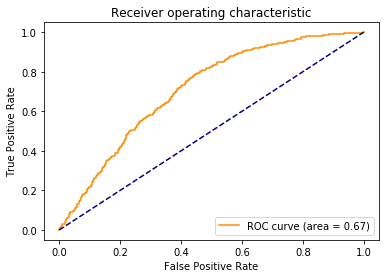

In [20]:
roc_auc=roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* Training accuracy is 84%
* Testing accuracy is 84%
* F1 score with optimum threshold is 37%

### Decision Tree

In [21]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
print('Train score:',dt.score(x_train,y_train))
print('Test score:',dt.score(x_test,y_test))

Train score: 1.0
Test score: 0.961


In [22]:
fpr,tpr,threholds=roc_curve(y_test,dt.predict_proba(x_test)[:,1])
optF1=0
optTh=0
for th in threholds:
    preds=np.where(dt.predict_proba(x_test)[:,1]>th,1,0)
    f1=f1_score(y_test,preds)
    if(optF1<f1):
        optF1=f1
        optTh=th
print('Optimum F1:',optF1)
print('Optimum Threshold:',optTh)

Optimum F1: 0.8729641693811075
Optimum Threshold: 0.0


In [23]:
y_pred=np.where(dt.predict_proba(x_test)[:,1]>0,1,0)
cn=confusion_matrix(y_test,y_pred)
cn=pd.DataFrame(cn,columns=['Predicted 0','Predicted 1'],index=['Actual 0','Actual 1'])
cn

,Predicted 0,Predicted 1
Actual 0,2481,54
Actual 1,63,402


In [24]:
f1_score(y_test,y_pred)

0.8729641693811075

In [25]:
print('Kappa Score:',cohen_kappa_score(y_test,y_pred))

Kappa Score: 0.8499307372633523


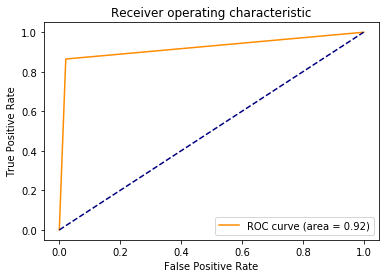

In [26]:
roc_auc=roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* Training accuracy is 100%
* Testing accuracy is 96%
* F1 score with optimum threshold is 87%

### Random Forest

In [27]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
print('Train score:',rf.score(x_train,y_train))
print('Test score:',rf.score(x_test,y_test))

Train score: 0.9971428571428571
Test score: 0.96


In [28]:
fpr,tpr,threholds=roc_curve(y_test,rf.predict_proba(x_test)[:,1])
optF1=0
optTh=0
for th in threholds:
    preds=np.where(rf.predict_proba(x_test)[:,1]>th,1,0)
    f1=f1_score(y_test,preds)
    if(optF1<f1):
        optF1=f1
        optTh=th
print('Optimum F1:',optF1)
print('Optimum Threshold:',optTh)

Optimum F1: 0.8898776418242491
Optimum Threshold: 0.4


In [29]:
y_pred=np.where(rf.predict_proba(x_test)[:,1]>0.3,1,0)
cn=confusion_matrix(y_test,y_pred)
cn=pd.DataFrame(cn,columns=['Predicted 0','Predicted 1'],index=['Actual 0','Actual 1'])
cn

,Predicted 0,Predicted 1
Actual 0,2463,72
Actual 1,43,422


In [30]:
f1_score(y_test,y_pred)

0.8800834202294056

In [31]:
print('Kappa Score:',cohen_kappa_score(y_test,y_pred))

Kappa Score: 0.8572953118407663


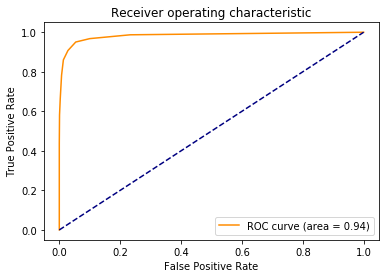

In [32]:
roc_auc=roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* Training accuracy is 99%
* Testing accuracy is 96%
* F1 score with optimum threshold is 89%

### Boosting

In [33]:
gbr=GradientBoostingClassifier()
gbr.fit(x_train,y_train)
print('Train score:',gbr.score(x_train,y_train))
print('Test score:',gbr.score(x_test,y_test))

Train score: 0.9901428571428571
Test score: 0.9766666666666667


In [34]:
fpr,tpr,threholds=roc_curve(y_test,gbr.predict_proba(x_test)[:,1])
optF1=0
optTh=0
for th in threholds:
    preds=np.where(gbr.predict_proba(x_test)[:,1]>th,1,0)
    f1=f1_score(y_test,preds)
    if(optF1<f1):
        optF1=f1
        optTh=th
print('Optimum F1:',optF1)
print('Optimum Threshold:',optTh)

Optimum F1: 0.9250263991552271
Optimum Threshold: 0.3618855170800892


In [35]:
y_pred=np.where(gbr.predict_proba(x_test)[:,1]>optTh,1,0)
cn=confusion_matrix(y_test,y_pred)
cn=pd.DataFrame(cn,columns=['Predicted 0','Predicted 1'],index=['Actual 0','Actual 1'])
cn

,Predicted 0,Predicted 1
Actual 0,2491,44
Actual 1,27,438


In [36]:
f1_score(y_test,y_pred)

0.9250263991552271

In [37]:
print('Kappa Score:',cohen_kappa_score(y_test,y_pred))

Kappa Score: 0.9109807166679205


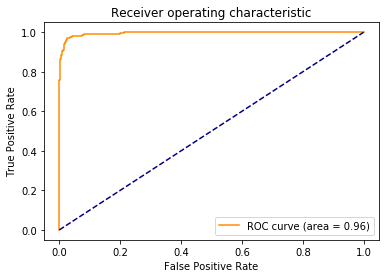

In [38]:
roc_auc=roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* Training accuracy is 99%
* Testing accuracy is 97%
* F1 score with optimum threshold is 92%

### Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
nb=GaussianNB()
nb.fit(x_train,y_train)
print('Train score:',nb.score(x_train,y_train))
print('Test score:',nb.score(x_test,y_test))

Train score: 0.8492857142857143
Test score: 0.8463333333333334


In [41]:
fpr,tpr,threholds=roc_curve(y_test,nb.predict_proba(x_test)[:,1])
optF1=0
optTh=0
for th in threholds:
    preds=np.where(nb.predict_proba(x_test)[:,1]>th,1,0)
    f1=f1_score(y_test,preds)
    if(optF1<f1):
        optF1=f1
        optTh=th
print('Optimum F1:',optF1)
print('Optimum Threshold:',optTh)

Optimum F1: 0.5019485580670304
Optimum Threshold: 0.2903702212913427


In [42]:
y_pred=np.where(nb.predict_proba(x_test)[:,1]>optTh,1,0)
cn=confusion_matrix(y_test,y_pred)
cn=pd.DataFrame(cn,columns=['Predicted 0','Predicted 1'],index=['Actual 0','Actual 1'])
cn

,Predicted 0,Predicted 1
Actual 0,2039,496
Actual 1,143,322


In [43]:
f1_score(y_test,y_pred)

0.5019485580670304

In [44]:
print('Kappa Score:',cohen_kappa_score(y_test,y_pred))

Kappa Score: 0.3792621087602728


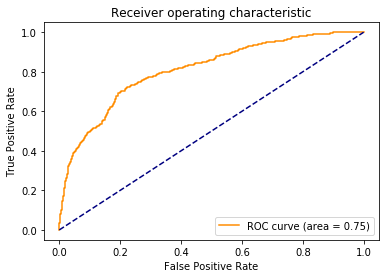

In [45]:
roc_auc=roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* Training accuracy is 84%
* Testing accuracy is 84%
* F1 score with optimum threshold is 50%

### KNN

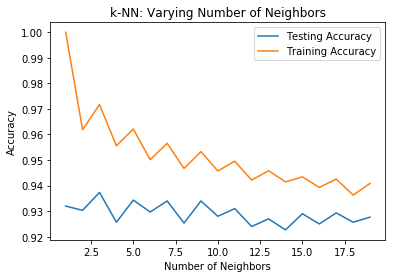

In [46]:
neighbors = np.arange(1, 20)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
sc=StandardScaler()
scaledX_train = sc.fit_transform(x_train)
scaledX_test = sc.transform(x_test)
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
    train_accuracy_plot[i] = knn.score(scaledX_train,y_train)
    test_accuracy_plot[i] = knn.score(scaledX_test,y_test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [47]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
print('Train score:',knn.score(x_train,y_train))
print('Test score:',knn.score(x_test,y_test))

Train score: 0.8527142857142858
Test score: 0.8346666666666667


In [48]:
fpr,tpr,threholds=roc_curve(y_test,knn.predict_proba(x_test)[:,1])
optF1=0
optTh=0
for th in threholds:
    preds=np.where(knn.predict_proba(x_test)[:,1]>th,1,0)
    f1=f1_score(y_test,preds)
    if(optF1<f1):
        optF1=f1
        optTh=th
print('Optimum F1:',optF1)
print('Optimum Threshold:',optTh)


Optimum F1: 0.3345543345543346
Optimum Threshold: 0.1111111111111111


In [49]:
y_pred=np.where(knn.predict_proba(x_test)[:,1]>optTh,1,0)
cn=confusion_matrix(y_test,y_pred)
cn=pd.DataFrame(cn,columns=['Predicted 0','Predicted 1'],index=['Actual 0','Actual 1'])
cn

,Predicted 0,Predicted 1
Actual 0,1636,899
Actual 1,191,274


In [50]:
f1_score(y_test,y_pred)

0.3345543345543346

In [51]:
print('Kappa Score:',cohen_kappa_score(y_test,y_pred))

Kappa Score: 0.1446754082409346


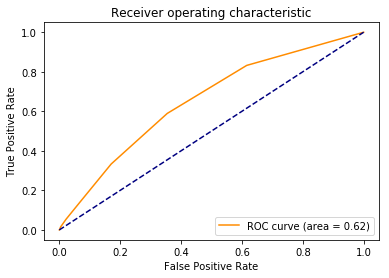

In [52]:
roc_auc=roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

* Training accuracy is 85%
* Testing accuracy is 83%
* F1 score with optimum threshold is 33%

### Conclusion

* KNN gives Training accuracy as 85%, Testing accuracy as 83% and F1 score with optimum threshold is 33%
* Naive Bayes gives Training accuracy as 84%, Testing accuracy as 84% and F1 score with optimum threshold is 50%
* Logistic gives Training accuracy as 84%, Testing accuracy as 84% and F1 score with optimum threshold is 37%
* Decision Tree gives Training accuracy as 100%, Testing accuracy as 96% and F1 score with optimum threshold is 87%
* Random Forest gives Training accuracy as 99%, Testing accuracy as 96% and F1 score with optimum threshold is 89%
* Gradient Boosting gives Training accuracy as 99%, Testing accuracy as 97% and F1 score with optimum threshold is 92%
* Also the Kappa Score was highest for Gradient Boosting
* By comparing all models we found that GradientBoosting gives best accuracy and F1 score for our data set. Thus GradientBoosting will be our final model

### Predicting using Gradient Boosting

In [53]:
test=pd.read_csv('Test 2.csv')
test.head()

,customer_id,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer
0,596723,AX03efs,W,N,26323.092375,3.000000,0.461364,603,505.509062,23.806688,0.351222,NaN
1,841834,AX03efs,E,Y,67374.621654,17.861095,0.473517,650,466.158076,26.068803,0.080106,NaN
2,402401,AX03efs,E,N,1728.369713,21.604489,0.486220,606,603.346280,23.628955,0.208180,NaN
3,734431,AX03efs,E,Y,15814.210261,22.058403,0.462249,530,747.158221,22.533957,0.080122,NaN
4,739547,AX03efs,W,Y,45233.588193,1.000000,0.541660,640,704.781194,24.298782,0.667270,NaN


In [54]:
test.shape

(10000, 12)

In [55]:
test.isnull().sum()

customer_id              0
demographic_slice        0
country_reg              0
ad_exp                   0
est_income               0
hold_bal                 0
pref_cust_prob           0
imp_cscore               0
RiskScore                0
imp_crediteval           0
axio_score               0
card_offer           10000
dtype: int64

In [56]:
test=pd.get_dummies(test,columns=['demographic_slice','ad_exp','country_reg'])
test.head()

,customer_id,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer,demographic_slice_AX03efs,demographic_slice_BWEsk45,demographic_slice_CARDIF2,demographic_slice_DERS3w5,ad_exp_N,ad_exp_Y,country_reg_E,country_reg_W
0,596723,26323.092375,3.000000,0.461364,603,505.509062,23.806688,0.351222,NaN,1,0,0,0,1,0,0,1
1,841834,67374.621654,17.861095,0.473517,650,466.158076,26.068803,0.080106,NaN,1,0,0,0,0,1,1,0
2,402401,1728.369713,21.604489,0.486220,606,603.346280,23.628955,0.208180,NaN,1,0,0,0,1,0,1,0
3,734431,15814.210261,22.058403,0.462249,530,747.158221,22.533957,0.080122,NaN,1,0,0,0,0,1,1,0
4,739547,45233.588193,1.000000,0.541660,640,704.781194,24.298782,0.667270,NaN,1,0,0,0,0,1,0,1


In [57]:
X=test.drop(['customer_id','card_offer'],axis=1)
optTh=0.3618855170800892

In [58]:
Y_pred=np.where(gbr.predict_proba(X)[:,1]>optTh,1,0)

In [59]:
Y_pred.shape

(10000,)

In [60]:
test['card_offer']=Y_pred
test['card_offer']=np.where(test['card_offer']==1,True,False)
test.head()

,customer_id,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer,demographic_slice_AX03efs,demographic_slice_BWEsk45,demographic_slice_CARDIF2,demographic_slice_DERS3w5,ad_exp_N,ad_exp_Y,country_reg_E,country_reg_W
0,596723,26323.092375,3.000000,0.461364,603,505.509062,23.806688,0.351222,False,1,0,0,0,1,0,0,1
1,841834,67374.621654,17.861095,0.473517,650,466.158076,26.068803,0.080106,False,1,0,0,0,0,1,1,0
2,402401,1728.369713,21.604489,0.486220,606,603.346280,23.628955,0.208180,False,1,0,0,0,1,0,1,0
3,734431,15814.210261,22.058403,0.462249,530,747.158221,22.533957,0.080122,False,1,0,0,0,0,1,1,0
4,739547,45233.588193,1.000000,0.541660,640,704.781194,24.298782,0.667270,False,1,0,0,0,0,1,0,1


In [61]:
test.to_csv('Prediction.csv',index=False)

### -------------------------------------------------------------------END-------------------------------------------------------------------